visualizing horizon

In [1]:
import numpy as np
import matplotlib.pylab as plt
from eigsep_terrain.marjum_dem import MarjumDEM as DEM
import eigsep_terrain as et
import eigsep_terrain.utils as etu
import tqdm
import healpy
from matplotlib.image import imread
from matplotlib import transforms
from image_class import Image


In [2]:
# load image data
img0 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img0.PNG', 
            label='img0', lat=39.247880, lon=-113.402623, alt=1698.0, roll=6.5, heading=88,
            angle_up=84.6, ver_weight=1/4, hor_weight=1/16, dis_weight=23*47)

img1 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img1.PNG', 
            label='img1', lat=39.247441, lon=-113.402693, alt=1659.0, roll=3.6, heading=358,
            angle_up=49.0, ver_weight=1/24, hor_weight=1/8, dis_weight=13*14)

img2 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img2.PNG', 
            label='img2', lat=39.247484, lon=-113.402730, alt=1695.0, roll=1.2, heading=352,
            angle_up=50, ver_weight=1/7, hor_weight=1/22, dis_weight=12*16)

img3 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img3.PNG', 
            label='img3', lat=39.247797, lon=-113.402905, alt=1713.0, roll=30.3, heading=166,
            angle_up=84.8, ver_weight=1/32, hor_weight=1/6, dis_weight=11*10)

img4 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img4.PNG', 
            label='img4', lat=39.247566, lon=-113.402991, alt=1746.0, roll=31.5, heading=150,
            angle_up=85.0, ver_weight=1/11, hor_weight=1/57, dis_weight=9*13)

img5 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img5.PNG', 
            label='img5', lat=39.248385, lon=-113.401491, alt=1761.0, roll=7.0, heading=236,
            angle_up=13.0, ver_weight=1/7, hor_weight=1/5, dis_weight=4*6)

img6 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img6.PNG', 
            label='img6', lat=39.248631, lon=-113.404227, alt=1834.0, roll=-6.5, heading=133,
            angle_up=-17.3, ver_weight=1/15, hor_weight=1/9, dis_weight=9*10)

img7 = Image(pathname='/Users/komalkaur/Desktop/eigsep_stuff/hrzn_mapping/crosshair-imgs/img7.PNG', 
            label='img7', lat=39.248400, lon=-113.401572, alt=1759.0, roll=0.8, heading=240,
            angle_up=17.4, ver_weight=1/18, hor_weight=1/8, dis_weight=6*7)


In [3]:
CACHE_FILE = 'marjum_dem.npz'
dem = DEM(cache_file=CACHE_FILE)


In [4]:
# known sites
dem['1P'] = np.array([1648, 2024, 1796])  # Site 1, index 0, 114 m off ground


In [5]:
# center = np.array(dem['1P'])
center = np.array([1748.46382236, 2099.56856865, 1757.40517973 - 15])
nside_full = 128
runs = 1
r = np.empty((runs, healpy.nside2npix(nside=nside_full)), dtype=np.float32)
for i in range(runs):

    r[i] = dem.ray_trace_distances(center + 0 * np.random.normal(size=3), nside=nside_full)

T = np.where(np.isnan(r), 3000, 300)
T_mean = np.mean(T, axis=1)
print(T_mean)
    

[1020.63446045]


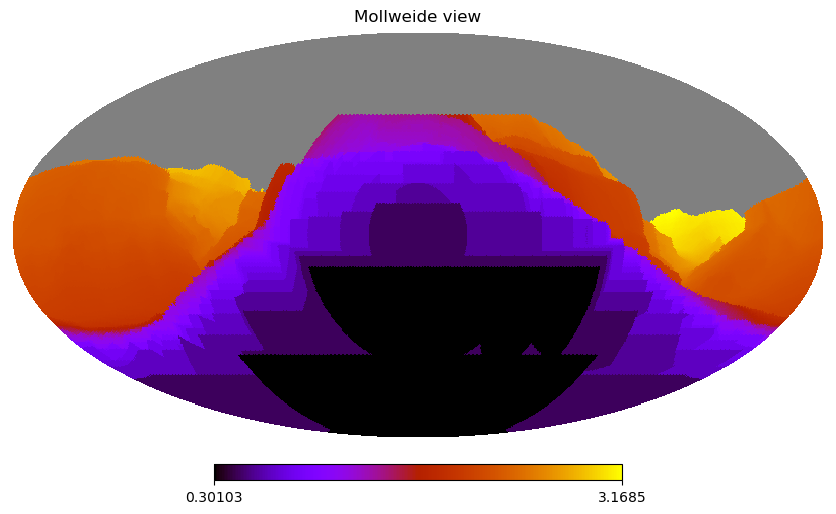

In [61]:
#healpy.mollview(h.map)
# fig, ax = plt.subplots()
healpy.mollview(np.log10(r[0]), cmap='gnuplot', reuse_axes=False)
# healpy.mollview(np.log10(r[1]), cmap='viridis', reuse_axes=True)
# img = plt.gca().get_images()[1]
# img.set_alpha(0.5)
#healpy.mollview((T_sky_full[:, 180]), cmap='plasma')


tweak each parameter to find the correct angle to pix ratio (brute force)
- somehow account for tilt :0 -> tilt the image instead of the map

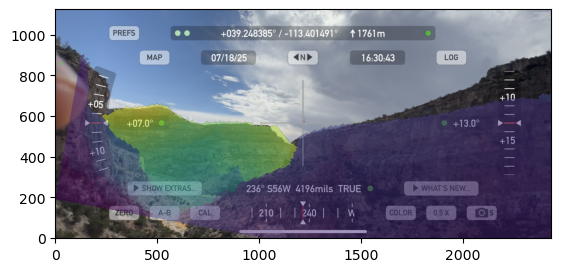

In [59]:
angle_per_pix = 0.0013751843942768679 / 1.8
# angle_per_pix = 0.0013751843942768679 # value from horizon.ipynb

phi = np.deg2rad(210) + (np.arange(2436) - 2436/2) * angle_per_pix
phi = phi % (2 * np.pi)
theta = np.deg2rad(80) + (np.arange(1125) - 1125/2) * angle_per_pix
theta = theta % (np.pi)

x, y = np.meshgrid(theta, phi)

pix = healpy.ang2pix(nside_full, x, y)
img = r[0][pix]

fig = plt.figure()
back = plt.imread(img5.photo)
ax = fig.add_subplot(111)

tr = transforms.Affine2D().rotate_deg(-1.5*img5.roll) + transforms.Affine2D().translate(0, 190)

ax.imshow(np.flipud(back))
ax.imshow(np.fliplr(np.flipud(img.T)), origin='lower', alpha=.5, transform=tr + ax.transData)


once angle to pix is pinned down, use a neural net to pull out the horizon and fit the remaining paramters to it (neuralnet.ipynb)

In [62]:
angle_per_pix

0.0007639913301538154